In [27]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import fbprophet
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from matplotlib import pyplot as plt

To develop a functional application with a prophet backbone, I define the following methods.
Method read_data -> reads the input csv file.
Method gold_forecast -> instantiate a prophet object and return the forecast dataframe.
Method box_cox_transformation -> applies power transformation on input data.
Method inverse_box_cox -> applies inverse transformation.

In [102]:
file_path='C://Users//Nikkitha//Desktop//Time-Series-Forecasting//gold.csv'

In [103]:
def read_data(file_path):
    df=pd.read_csv(file_path)
    print(df.head())
    print(df.tail())
    
    return df

In [104]:
def gold_forecast(df):
    m=Prophet(daily_seasonality=False, weekly_seasonality=True)
    m.fit(df);
    future=m.make_future_dataframe(periods=730)
    print(future.tail())
    forecast=m.predict(future)
    forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
    fig1=m.plot(forecast)
    fig2=m.plot_components(forecast)
    
    return forecast, future

In [105]:
def box_cox_transformation(df):
    df['y'], lam=boxcox(df['y'])
    print(lam)
    df.plot()
    
    return df,lam

In [106]:
def inverse_box_cox(forecast,lam):
    forecast[['yhat','yhat_upper','yhat_lower']]=forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x,lam))
    forecast['yhat'].plot();
    df['y'].plot();
    
    return forecast

In [107]:
df = read_data(file_path)

           ds        y
0  01/01/2016      NaN
1  02/01/2016      NaN
2  03/01/2016      NaN
3  04/01/2016  1068.46
4  05/01/2016  1074.19
              ds        y
1272  26/06/2019  1415.78
1273  27/06/2019  1408.28
1274  28/06/2019  1419.94
1275  29/06/2019      NaN
1276  30/06/2019      NaN


8.472135811722177


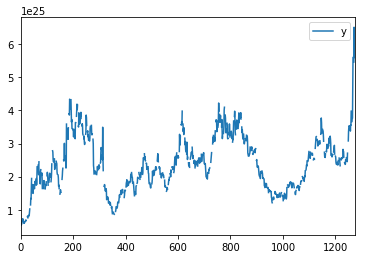

In [108]:
transformed_df,lam=box_cox_transformation(df)

             ds
2002 2021-12-01
2003 2021-12-02
2004 2021-12-03
2005 2021-12-04
2006 2021-12-05


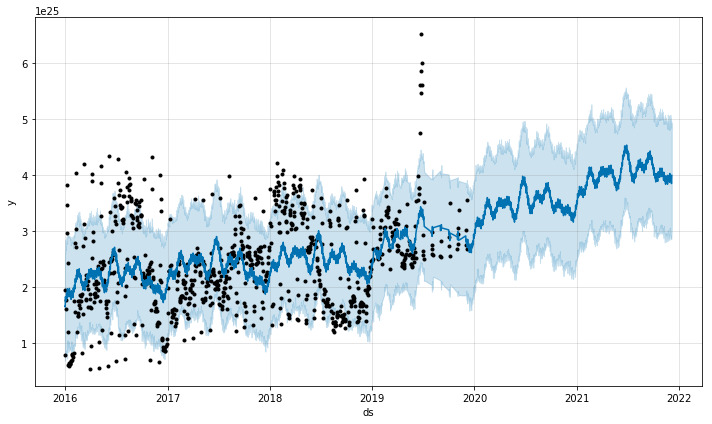

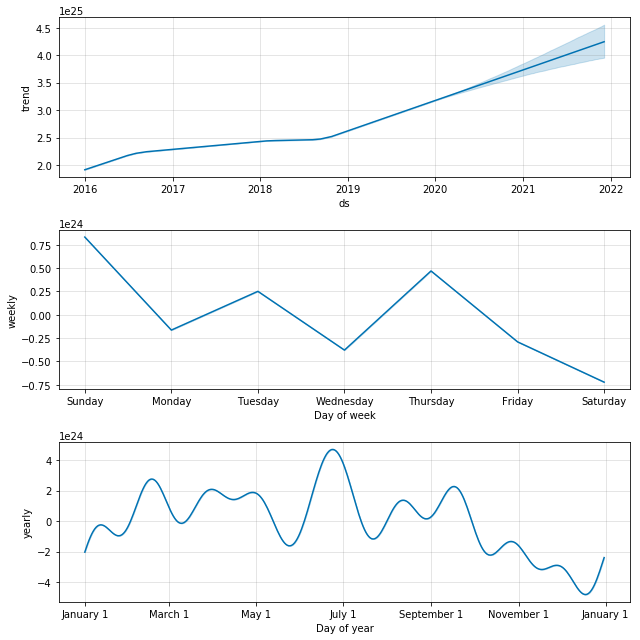

In [109]:
forecast, future=gold_forecast(transformed_df)